In [1]:
import pandas as pd
import numpy as np
import os
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data
fb=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
tw=pd.read_csv('Tw_age_gender.csv')

/Users/Dexter/Documents/tools/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,39,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Problem statement

- User segmentation in Facebook vs Twitter
- Which user segment to target in which platform- Twitter or Facebook for product promotion
- In FB which kind of users to target for Product Promotion


### Collection of data
###### Facebook data:
- source: https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv
  - Facebook data: fields are self explanatory

###### Twitter dataset:
- source: https://www.kaggle.com/panoskostakos/twitter-data-age-and-gender-prediction

- Anonymised dataset with 80 profile features (including age and gender) for over 80K twitter users. 
  Out of which used columns are 'user.followers_count','user.friends_count','faceAttributes.gender',           'faceAttributes.age','user.favourites_count','prof_status','profile_age_y' from the data so we can compare against available data of Facebook.

- Fields in Twitter data as below:
  - followers: Number of followers for an user
  - number of connections following by user
  - gender
  - age
  - favourites: number of tweets an user has marked as favourites 
  - profile status: status of profile
  - profile_age_yr: number of years user is using his profile





In [3]:
## Finding number of NULLS and renaming columns of Twitter dataset

tw_mod=tw[['user.followers_count','user.friends_count','faceAttributes.gender',
           'faceAttributes.age','user.favourites_count','prof_status','profile_age_y']]
tw_mod.rename(columns={'user.followers_count':'followers','user.friends_count':'friends',
                       'faceAttributes.gender':'gender','faceAttributes.age':'age',
                       'user.favourites_count':'favourites','profile_age_y':'profile_age_yr'},inplace=True)

print("Number of nulls in Twitter:\n",tw_mod.isnull().sum())
print("\n\nNumber of nulls in Facebook:\n", fb.isnull().sum())


Number of nulls in Twitter:
 followers          0
friends            0
gender            24
age               24
favourites         0
prof_status        0
profile_age_yr     0
dtype: int64


Number of nulls in Facebook:
 userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64


/Users/Dexter/Documents/tools/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [4]:
# Profiling
report_fb=pandas_profiling.ProfileReport(fb)
report_fb.to_file(output_file="FB_Report.html")

report_tw=pandas_profiling.ProfileReport(tw_mod)
report_tw.to_file(output_file="TW_Report.html")


### PreProfiling:
- Twitter data has both deleted and other profile statuses
- Facebook data: gender has 175 nulls in it. Tenure has 2 nulls in it
- Twitter data has gender and age with 20 null values
- 95.1 is the highest age of user in Twitter
- 113 is the highest age of user in Facebook
- 4244 data points are present in Facebook dataset that has more than 96 as user age. 96 is considered as the upper limit for age in FB data for this analysis since 95.1 is the highest user age in Twitter


### PreProcessing:
- Preprocessing on facebook data:
  - removed columns dob_day, dob_month and userID. These columns wouldn’t be giving any additional insights since we have age as one column
  - missing value imputation: mean is more than median for tenure. Its right skewed , so have used median for replacement of the nulls
  - missing value imputation: for gender used mode that is male in this case
  - tenure given is in days so have changed it to years by dividing with 365 to compare against Twitter
  - removed the age greater than or equal to 96. Twitter has highest 95.1 so, limited at 96 in FB
- Preprocessing of twitter data
  - used columns are 'user.followers_count','user.friends_count','faceAttributes.gender',        'faceAttributes.age','user.favourites_count','prof_status','profile_age_y'
  - removed the profiles where the profile status is deleted
  - missing value imputation: used median for age and mode for gender

- Overall processing
  - facebook data and twitter data are concatenated row wise for further analysis.
  - Tenure group are formed:0-5,6-15,16-30,Above 30
  - Age groups are formed: 0-10,11-24,25-40,41-60,61-80,Above 80
  - DOB Year grouping is made:Below 1997,After 1997 to study if there is millennial effect

### Preprocessing on facebook data:

In [5]:
print('{} is median for tenure'.format(fb['tenure'].median()))
print('{} is mean for tenure'.format(fb['tenure'].mean()))
print('{} is mode for gender'.format(fb['gender'].mode()[0]))

412.0 is median for tenure
537.8873748750012 is mean for tenure
male is mode for gender


In [6]:
# no use of these columns
fb=fb.drop(['dob_day','dob_month','userid'],axis=1) 

##missing value fill in fb data
fb['tenure'].fillna((fb['tenure'].median()),inplace=True)
fb['gender'].fillna((fb['gender'].mode()[0]),inplace=True)

##converting in years to compare against twitter tenure
fb['tenure']=fb['tenure']/365

## removed age above 96
fb=fb[fb['age']<96]


### Preprocessing of twitter data

In [7]:
print('{} is median for age'.format(tw_mod['age'].median()))
print('{} is mean for age'.format(tw_mod['age'].mean()))
print('{} is mode for gender'.format(tw_mod['gender'].mode()[0]))

33.4 is median for age
35.74937312619257 is mean for age
male is mode for gender


In [8]:
#remove deleted profiles
tw_mod=tw_mod[~(tw_mod['prof_status']=='deleted')]

##missing value fill in twitter data
tw_mod['age'].fillna((tw_mod['age'].mean()),inplace=True)
tw_mod['gender'].fillna((tw_mod['gender'].mode()[0]),inplace=True)

### Profiling post processing

In [9]:
report_fb=pandas_profiling.ProfileReport(fb)
report_fb.to_file(output_file="FB_Report_mod.html")

report_tw=pandas_profiling.ProfileReport(tw_mod)
report_tw.to_file(output_file="TW_Report_mod.html")


### Overall processing

In [10]:
age1=fb[['age','gender','tenure','dob_year','likes','friend_count']]
age1['source']='facebook'
age2=tw_mod[['age','gender','profile_age_yr','favourites','friends']]
age2['source']='twitter'
age2.rename(columns={'profile_age_yr':'tenure','favourites':'likes','friends':'friend_count'},inplace=True)
age2['dob_year']=2016-age2['age']
age=pd.concat([age1,age2],axis=0)
age.reset_index(inplace=True)

In [11]:
# age grouping
l=[]
for i in range (len(age)):
    if (age['age'][i]<11):
        l.append('0-10')
    elif (age['age'][i]>10) and (age['age'][i]<25):
        l.append('11-24')
    elif (age['age'][i]>24 and age['age'][i]<41):
        l.append('25-40')
    elif (age['age'][i]>40 and age['age'][i]<61):
        l.append('41-60')
    elif (age['age'][i]>60 and age['age'][i]<91):
        l.append('61-80')
    else:
        l.append('Above 80')
        
age['age_group']=l

In [12]:
# tenure grouping

l=[]
for i in range (len(age)):
    if (age['tenure'][i]<3):
        l.append('0-2')
    elif (age['tenure'][i]>2) and (age['tenure'][i]<5):
        l.append('3-5')
    else: 
        l.append('Above 5')
        
age['tenure_group']=l

In [13]:
# DOB year Group
l=[]
for i in range (len(age)):
    if (age['dob_year'][i]<1997):
        l.append('Before 1997')
    else:
        l.append('After 1997')

        
age['dob_year_group']=l

### EDA:
- Presence of users in Facebook vs Twitter per age group. Which age group prefers Twitter and which age group  prefers Facebook
- Presence of users in Facebook vs Twitter per gender. Which gender prefers Twitter and which gender  prefers Facebook
- Presence of users in Facebook vs Twitter per tenure. what’s the tenure of users to stick around Facebook vs twitter.
- Presence of users in Facebook vs Twitter per activity. Activity in Facebook vs Twitter, where are the users more active. 
- DOB data point is not present in Twitter data. To find out, have subtracted age from 2016 (assuming the data is collected in 2016. This is compared against DOB Facebook. The DOB  is grouped in two: Before 1996 and after 1996
- Friend list in Twitter vs Facebook . This also determines the activity on Facebook. also, it states that possibly only known people are been added in FB when compared to Twitter, where people more freely connect and mark favourites (viewpoints)

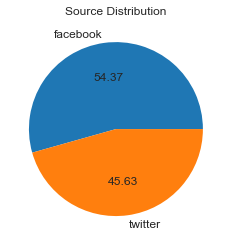

In [14]:
age['source'].value_counts().plot(kind='pie',autopct='%.2f',title="Source Distribution", fontsize=12).set_ylabel("")
plt.show()

###### Findings
- We have 54% data from Facebook and 46% data from Twitter

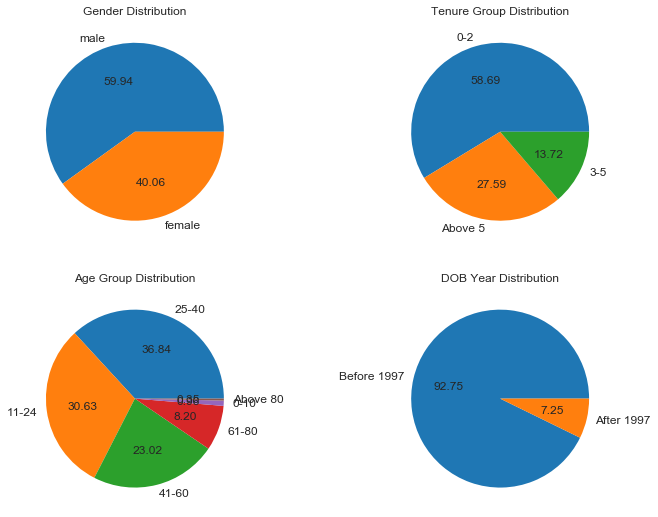

In [15]:
fig,ax=plt.subplots(2,2,figsize=(12,9))

age['gender'].value_counts().plot(kind='pie',autopct='%.2f',title="Gender Distribution", fontsize=12,ax=ax[0,0])
age['tenure_group'].value_counts().plot(kind='pie',autopct='%.2f',title="Tenure Group Distribution", fontsize=12,ax=ax[0,1])
age['age_group'].value_counts().plot(kind='pie',autopct='%.2f',title="Age Group Distribution",fontsize=12,ax=ax[1,0])
age['dob_year_group'].value_counts().plot(kind='pie',autopct='%.2f',title="DOB Year Distribution", fontsize=12,ax=ax[1,1])

t=[['gender','tenure_group'],['age_group','dob_year_group']]
for i in range(2):
    for j in range(2):
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        


plt.show()

###### Findings
- The number of users are majorly in age group 25-40 followed by 11-24
- 60% Males are the users and 60% 
- Users are mostly of 0-2 years tenure across FB and Twitter. 
- There is less of millennial data

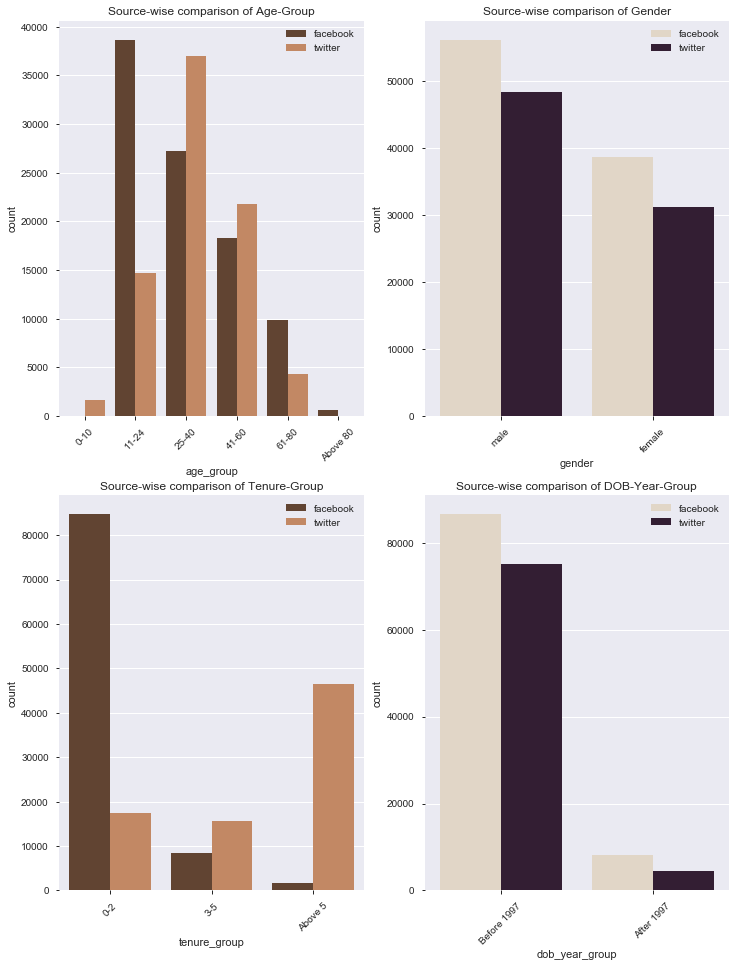

In [16]:
fig,ax=plt.subplots(2,2,figsize=(12,16))

sns.countplot(x='age_group',hue='source',order=['0-10','11-24','25-40','41-60','61-80','Above 80'],
              data=age,palette='copper',ax=ax[0,0]).set_title('Source-wise comparison of Age-Group')
sns.countplot(x='gender',hue='source',data=age,palette='ch:.25',ax=ax[0,1]).set_title('Source-wise comparison of Gender')
sns.countplot(x='tenure_group',hue='source',order=['0-2','3-5','Above 5'],data=age,
              palette='copper',ax=ax[1,0]).set_title('Source-wise comparison of Tenure-Group')
sns.countplot(x='dob_year_group',hue='source',order=['Before 1997','After 1997'],data=age,palette='ch:.25',
              ax=ax[1,1]).set_title('Source-wise comparison of DOB-Year-Group')

for i in range(2):
    for j in range(2):
        ax[i][j].legend(loc='upper right', frameon=False)
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.show()

####  Which age group and which Gender prefers Twitter vs Facebook?

- Age group 25-40 prefers Twitter
- Age group 11-24 prefers Facebook
- Number of users in Facebook is more compared against Twitter. Preference is indifferent based on Gender 


#### What’s the tenure of Users and Presence of DOB Year group in Facebook vs Twitter?

- Tenure in Twitter is more than Facebook. People stay in Twitter for longer
- DOB before 1997 is more in both platforms. 
- Millennials might not be a good candidate to be targeted via Facebook/Twitter. Their presence is low 



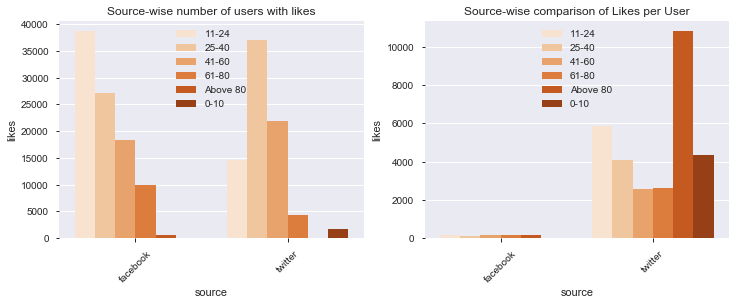

In [17]:
a=pd.DataFrame(age.groupby(['source','age_group'])['likes'].sum())
#sns.countplot(x='likes',hue='source',data=age)
a.reset_index(inplace=True)
fig,ax=plt.subplots(1,2,sharey=False, sharex=True,figsize=(12,4))

e=pd.DataFrame(age.groupby(['source','age_group'])['likes'].count())
e.reset_index(inplace=True)

a['likes']=a['likes']/e['likes']

sns.barplot(x='source',y='likes',hue='age_group',data=e,ax=ax[0],palette='Oranges').set_title('Source-wise number of users with likes')
sns.barplot(x='source',y='likes',hue='age_group',data=a,ax=ax[1],palette='Oranges').set_title('Source-wise comparison of Likes per User')
for i in range(2):
    ax[i].legend(loc='upper center', frameon=False)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)
        
plt.show()



#### Likes in Facebook vs Twitter, where are the users more active?

- The number of users in our data set in Twitter vs Facebook is almost similar however the average number of likes given in Facebook is much lesser than average number of tweets marked as favourites by Twitter users. 

- This says Twitter users are much more active than Facebook users across all age groups

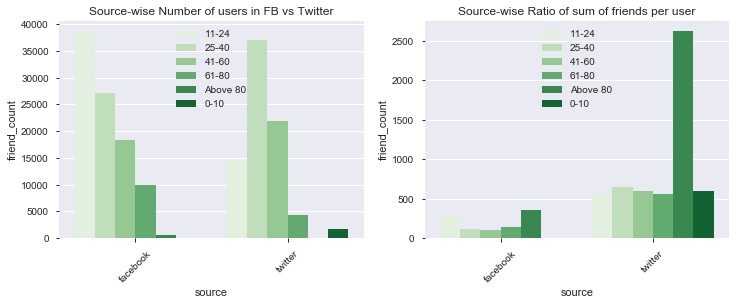

In [18]:
a=pd.DataFrame(age.groupby(['source','age_group'])['friend_count'].sum())
#sns.countplot(x='likes',hue='source',data=age)
a.reset_index(inplace=True)
fig,ax=plt.subplots(1,2,sharey=False, sharex=True,figsize=(12,4))

e=pd.DataFrame(age.groupby(['source','age_group'])['friend_count'].count())
e.reset_index(inplace=True)

a['friend_count']=a['friend_count']/e['friend_count']
#print(a)

sns.barplot(x='source',y='friend_count',hue='age_group',data=e,ax=ax[0],palette='Greens').set_title('Source-wise Number of users in FB vs Twitter')
sns.barplot(x='source',y='friend_count',hue='age_group',data=a,ax=ax[1],palette='Greens').set_title('Source-wise Ratio of sum of friends per user')

for i in range(2):
    ax[i].legend(loc='upper center', frameon=False)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)
        
plt.show()



####  Friend list in Twitter vs Facebook
- Facebook shows less number in terms of friends list. Twitter shows more average friends count than Facebook. 

- This suggests that possibly only known people are been added in FB when compared to Twitter, where people more freely connect and mark favourites(viewpoints)

### Finding and Conclusion:

##### Findings
- Age Group: Users of age group 25-40 mostly prefer Twitter. Users of age group 11-24 mostly prefer Facebook
- Gender: Overall number of users are more in Facebook, cant really be said which gender prefers facebook vs twitter. So, its indifferent based on gender. 
- Tenure: Tenure in Twitter is more than facebook.
- Activity: The number of users in our data set in Twitter vs Facebook is almost similar however the average number of likes given in facebook is much lesser than average number of tweets marked as favourites by Twitter users. This says Twitter users are much more active than facebook users. Above 80 age group, there is per user likes/favourites is high in Twitter
-  DOB Year: In both Twitter and Facebook the presence of users with DOB before 1997 is more. So, milennials might not be a good candidate to be targetted via Facebook/Twitter
- Activity and connections: Facebook shows less activity in terms of friends list. Twitter shows more average friends count than facebook. This suggests that possibly only known people are been added in FB when compared to Twitter, where people more freely connect and mark favourites (viewpoints)

##### Conclusion/Action Items
- The 25-40 agegroup and 41-60 is mostly present in Twitter and is also active mostly on Twitter than on Facebook. 
###### Hence, any product targetted towards 25-60 age group should be targetted via twitter than on Facebook. 


- The age group 11-24 is mostly present on Facebook than on Twitter however when number of favourites/likes and connections/friends are checked, it concludes that this group is more active on Twitter and not on facebook.
###### Hence, product campaign can happen in either of the platform for products targetted at 11-24 age group. Facebook since presence of this group is high and Twitter since they are very active on Twitter. Next analysis (part 2) is been done to drill down more on Facebook data to find exact target group


- 60-80 group is present on FB mostly and very few on Twitter. So, not a good idea to campaign in Twitter even if its activity is high.
###### To campaign a product targetted at this group, it should be done on FB platform because of their presence on FB. Next analysis (part 2) is been done to drill down more on Facebook data to find exact target group and this might be beneficial to have a campaign successful on FB for this group



- Above 80 is high on activity in Twitter but their presence is much less in Twitter or Facebook.
###### Hence, any product targetted to above 80 is not suggested to be campaigned on any of these platforms. 





### Step 2/3:
- Drill down on group 11-24 and 60-80 to find who are the target users on FB


### Preprocessing:
- Age group, tenure group and DOB Year Group created on FB data
- Filter the age group: 11-24 and 61-80



### 11-24

In [19]:
fb.reset_index(inplace=True)
# age grouping
l=[]
for i in range (len(fb)):
    if (fb['age'][i]<11):
        l.append('0-10')
    elif (fb['age'][i]>10) and (fb['age'][i]<25):
        l.append('11-24')
    elif (fb['age'][i]>24 and fb['age'][i]<41):
        l.append('25-40')
    elif (fb['age'][i]>40 and fb['age'][i]<61):
        l.append('41-60')
    elif (fb['age'][i]>60 and fb['age'][i]<91):
        l.append('61-80')
    else:
        l.append('Above 80')
        
fb['age_group']=l


# tenure grouping

l=[]
for i in range (len(fb)):
    if (fb['tenure'][i]<3):
        l.append('0-2')
    elif (fb['tenure'][i]>2) and (fb['tenure'][i]<5):
        l.append('3-5')
    else: 
        l.append('Above 5')
        
fb['tenure_group']=l

# DOB year Group
l=[]
for i in range (len(fb)):
    if (fb['dob_year'][i]<1997):
        l.append('Before 1997')
    else:
        l.append('After 1997')

        
fb['dob_year_group']=l


In [20]:
fb_sub=fb[(fb['age_group']=='11-24')] # filtered the groups 11-24 nd 61-80
#fb_sub.drop(['level_0','index','age_group'],axis=1,inplace=True)
fb_sub.reset_index(inplace=True)

In [21]:
l=[]
for i in range (len(fb_sub)):
    
    if (fb_sub['age'][i]<14):
        l.append('11-14')
        
    elif (14<=fb_sub['age'][i]<17):
        l.append('14-17')
        
    elif (17<=fb_sub['age'][i]<20):
        l.append('17-20')
        
    else:
        l.append('20 and Above')
        
        
fb_sub['age_group']=l

### EDA
- Distribution of age with tenure,gender and DOB Year
- Correlation between number of friends vs likes
- likes and friend count based on age group
- likes in mode of FB usage: web vs mobile



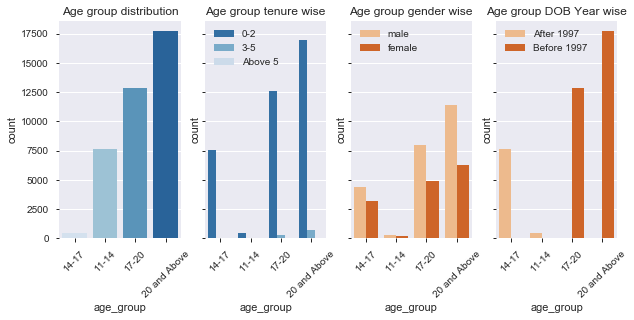

In [22]:
fig,ax=plt.subplots(1,4,sharey=True, sharex=True,figsize=(10,4))
sns.countplot(x='age_group',order=['11-14','14-17','17-20','20 and Above'],data=fb_sub,palette='Blues',ax=ax[0]).set_title('Age group distribution')
sns.countplot(x='age_group',hue='tenure_group',data=fb_sub,ax=ax[1],palette="Blues_r").set_title('Age group tenure wise')
sns.countplot(x='age_group',hue='gender',data=fb_sub,ax=ax[2],palette="Oranges").set_title('Age group gender wise')
sns.countplot(x='age_group',hue='dob_year_group',data=fb_sub,ax=ax[3],palette="Oranges").set_title('Age group DOB Year wise')


for i in range(4):
    for tick in ax[i].get_xticklabels():
        if i>0:
            ax[i].legend(loc='upper left', frameon=False)
            for tick in ax[i].get_xticklabels():
                tick.set_rotation(45)
        else:
            tick.set_rotation(45)
        
plt.show()

#### Observations inside 11-24 age group
- People with 20 and above age are most in the sample followed by 17-20 age group.
- All of these people are mostly 0-2 years in FB and not beyond. 
- Can be concluded that the people start using FB at the age of 18 and above. Mostly the male population uses it when compared against females. 

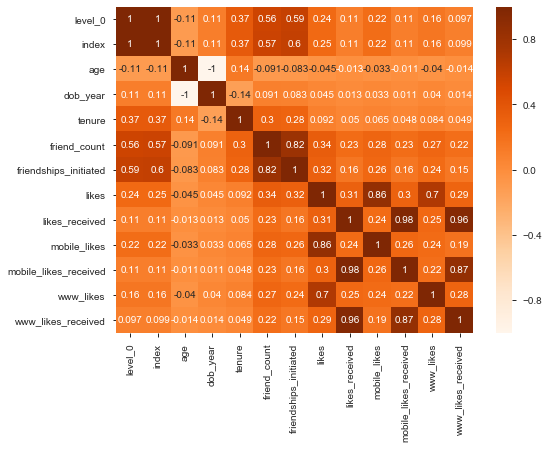

In [23]:
a=pd.DataFrame(fb_sub.groupby(['age_group','gender'])[['friend_count','friendships_initiated','likes', 
        'likes_received','mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received']].sum())
s=pd.DataFrame(fb_sub.groupby(['age_group','gender'])[['friend_count','friendships_initiated','likes', 
        'likes_received','mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received']].count())

c=a/s
c.reset_index(inplace=True)

plt.figure(figsize=(8,6))
sns.heatmap(fb_sub.corr(),
            vmin=-1,
            cmap="Oranges",
            annot=True)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 



###### Correlation findings
- Number of friends is strongly correlated with friendship initiated, mobile likes/likes received are more strongly correlated than web likes/likes received with the likes/likes received.
- Likes are positively correlated to number of friends but not very strongly
- age and friends count are in weak negative correlation. Similarly likes and age are in negative correlation
- With tenure, friend count has a positive correlation whereas likes are in weak positive correlation

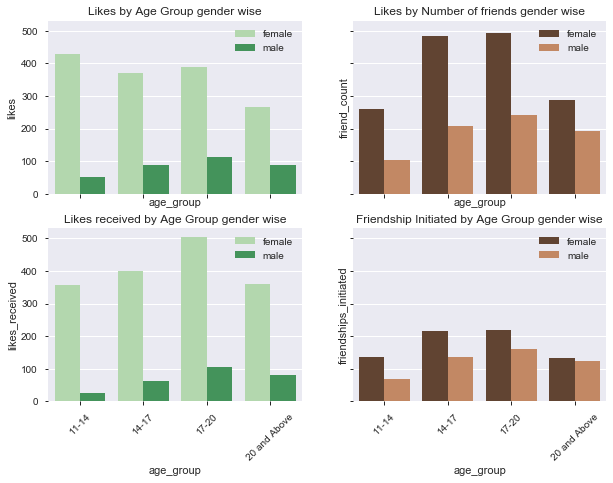

In [24]:

fig,ax=plt.subplots(2,2,sharey=True, sharex=True,figsize=(10,7))
sns.barplot(x='age_group', y='likes',
                hue="gender",order=['11-14','14-17','17-20','20 and Above'],
                data=c,ax=ax[0,0],palette="Greens").set_title('Likes by Age Group gender wise');

sns.barplot(x='age_group', y='friend_count',
                hue="gender",order=['11-14','14-17','17-20','20 and Above'],
                data=c,ax=ax[0,1],palette="copper").set_title('Likes by Number of friends gender wise');

sns.barplot(x='age_group', y='likes_received',
                hue="gender",order=['11-14','14-17','17-20','20 and Above'],
                data=c,ax=ax[1,0],palette="Greens").set_title('Likes received by Age Group gender wise');
sns.barplot(x='age_group', y='friendships_initiated',
                hue="gender",order=['11-14','14-17','17-20','20 and Above'],
                data=c,ax=ax[1,1],palette="copper").set_title('Friendship Initiated by Age Group gender wise')

for i in range(2):
    for j in range(2):
        ax[i][j].legend(loc='upper right', frameon=False)
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.show()

###### Findings:
- likes is more in number for 11-14 and 17-20 age group and it decreases in age group 20 and Above
- likes received is more in 17-20 age group than other age groups
- friend_count is more for age group 14-17 and 17-20 in comparison to 11-14 or 20 and above


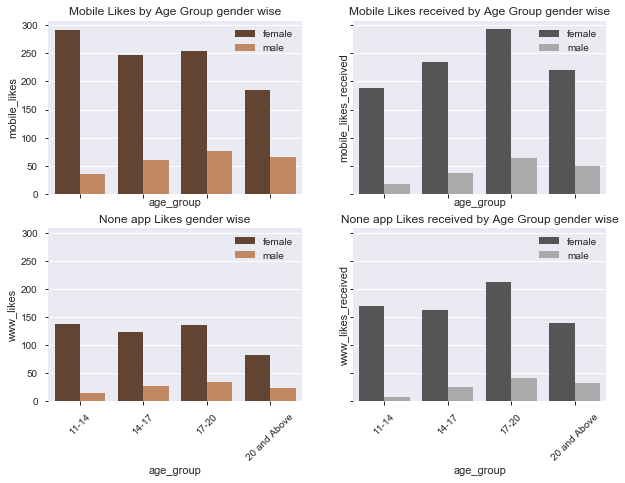

In [25]:
fig,ax=plt.subplots(2,2,sharey=True, sharex=True,figsize=(10,7))
sns.barplot(x='age_group', y='mobile_likes',
                hue="gender",
                data=c,ax=ax[0,0],palette="copper").set_title('Mobile Likes by Age Group gender wise');

sns.barplot(x='age_group', y='mobile_likes_received',
                hue="gender",
                data=c,ax=ax[0,1],palette="gray").set_title('Mobile Likes received by Age Group gender wise');

sns.barplot(x='age_group', y='www_likes',
                hue="gender",
                data=c,ax=ax[1,0],palette="copper").set_title('None app Likes gender wise');
sns.barplot(x='age_group', y='www_likes_received',
                hue="gender",
                data=c,ax=ax[1,1],palette="gray").set_title('None app Likes received by Age Group gender wise')

for i in range(2):
    for j in range(2):
        ax[i][j].legend(loc='upper right', frameon=False)
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.show()


###### Findings
- People using mobile for Facebook are more active than the ones using desktop version of FB

###### Observations and Insights (11-24)

- Distribution of age with tenure,gender and DOB Year
  -  People with 20 and above age are most in the sample followed by 17-20 age group.All of these people are mostly 0-2 years in FB and not beyond. These say most of the people start using FB at the age of 18 and above. Mostly the male population uses it when compared against females.

- Correlation between number of friends vs likes

  - Number of friends is strongly correlated with friendship initiated, mobile likes/likes received are more strongly correlated than web likes/likes received with the likes/likes received.
  - Likes are positively correlated to number of friends but not very strongly 
  - age and friends count are in weak negative correlation. Similarly likes and age are in negative correlation
  - With tenure, friend count has a positive correlation whereas likes are in weak positive correlation
  
- likes and friend count based on age group

  - likes is more in number for 11-14  and 17-20 age group females and it decreases in age group 20 and Above females
  - likes received is more in 17-20 age group females than other age groups
  - friend_count is more for females of age group 14-17 and 17-20 in comparison to 11-14 or 20 and above
  
- likes in mode of FB usage: web vs mobile

  - People using mobile for Facebook are more active than the ones using desktop version of FB

###### Actions/Insights:

- Females with 17-20 agegroup and who uses mobile to access FB have more friends and also receives and gets more likes. These are the right crowd to target while promotions on FB



### 61-80

In [26]:
fb_sub2=fb[(fb['age_group']=='61-80')] # filtered the groups 11-24 nd 61-80
#fb_sub2.drop(['level_0','index','age_group'],axis=1,inplace=True)
fb_sub2.reset_index(inplace=True)

In [27]:
l=[]
for i in range (len(fb_sub2)):
    
    if (fb_sub2['age'][i]<65):
        l.append('61-65')
        
    elif (65<=fb_sub2['age'][i]<70):
        l.append('65-70')
        
    elif (70<=fb_sub2['age'][i]<75):
        l.append('70-75')
        
    else:
        l.append('75 and Above')
        
        
fb_sub2['age_group']=l

### EDA
- Distribution of age with tenure,gender and DOB Year
- Correlation between number of friends vs likes
- likes and friend count based on age group
- likes in mode of FB usage: web vs mobile

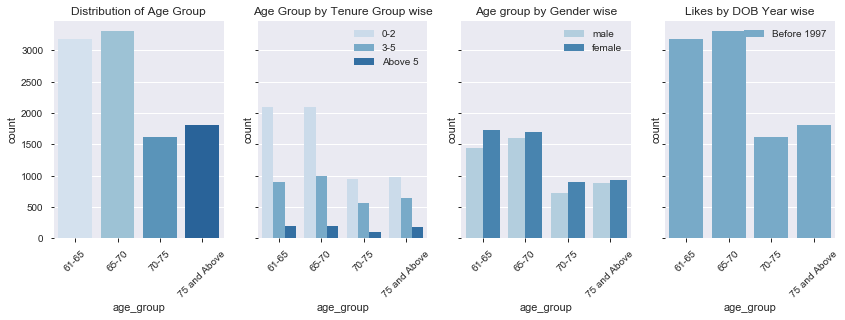

In [32]:
fig,ax=plt.subplots(1,4,sharey=True, sharex=True,figsize=(14,4))
sns.countplot(x='age_group',order=['61-65','65-70','70-75','75 and Above'],data=fb_sub2,
              palette='Blues',ax=ax[0]).set_title('Distribution of Age Group')
sns.countplot(x='age_group',hue='tenure_group',data=fb_sub2,ax=ax[1],palette="Blues").set_title('Age Group by Tenure Group wise')
sns.countplot(x='age_group',hue='gender',data=fb_sub2,ax=ax[2],palette="Blues").set_title('Age group by Gender wise')
sns.countplot(x='age_group',hue='dob_year_group',data=fb_sub2,ax=ax[3],palette="Blues").set_title('Likes by DOB Year wise')

for i in range(4):
    for tick in ax[i].get_xticklabels():
        if i>0:
            ax[i].legend(loc='upper right', frameon=False)
            for tick in ax[i].get_xticklabels():
                tick.set_rotation(45)
        else:
            tick.set_rotation(45)
        
plt.show()

#### Observations inside 61-80 age group
- People with 61-70 age group are most in the sample. 
- All of these people are mostly in 0-2 years in FB. 
- Both the genders are equally there on FB     

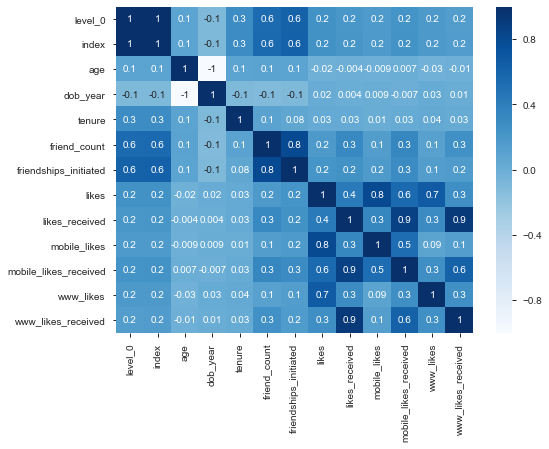

In [33]:
a=pd.DataFrame(fb_sub2.groupby(['age_group','gender'])[['friend_count','friendships_initiated','likes', 
        'likes_received','mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received']].sum())
s=pd.DataFrame(fb_sub2.groupby(['age_group','gender'])[['friend_count','friendships_initiated','likes', 
        'likes_received','mobile_likes','mobile_likes_received', 'www_likes', 'www_likes_received']].count())

c=a/s
c.reset_index(inplace=True)

plt.figure(figsize=(8,6))
sns.heatmap(fb_sub2.corr(),
            vmin=-1,
            cmap="Blues",
            annot=True,fmt='.1g')

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 


###### Correlation findings
- Number of friends is strongly correlated with friendship initiated

- Mobile likes received/mobile likes and web likes received/web likes are equally correlated with the likes received/likes.

- Likes received are positively correlated to number of friends but not very strongly. 

- Likes received vs likes given are as well positively correlated but not very strongly.

- Likes and age are in weak negative correlation


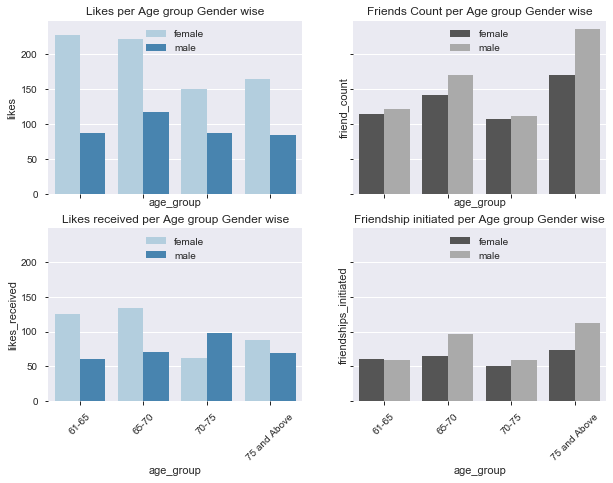

In [30]:
fig,ax=plt.subplots(2,2,sharey=True, sharex=True,figsize=(10,7))
sns.barplot(x='age_group', y='likes',
                hue="gender",order=['61-65','65-70','70-75','75 and Above'],
                data=c,ax=ax[0,0],palette="Blues").set_title('Likes per Age group Gender wise');

sns.barplot(x='age_group', y='friend_count',
                hue="gender",order=['61-65','65-70','70-75','75 and Above'],
                data=c,ax=ax[0,1],palette="gray").set_title('Friends Count per Age group Gender wise');

sns.barplot(x='age_group', y='likes_received',
                hue="gender",order=['61-65','65-70','70-75','75 and Above'],
                data=c,ax=ax[1,0],palette="Blues").set_title('Likes received per Age group Gender wise');
sns.barplot(x='age_group', y='friendships_initiated',
                hue="gender",order=['61-65','65-70','70-75','75 and Above'],
                data=c,ax=ax[1,1],palette="gray").set_title('Friendship initiated per Age group Gender wise')

for i in range(2):
    for j in range(2):
        ax[i][j].legend(loc='upper center', frameon=False)
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.show()

# Findings:
- likes is more number in females with 61-70 age group and it decreases in age group 70 and Above
- likes received is more in females with 61-70 age group than other age groups
- friend_count is more for age group 75 and Above with males having more friends


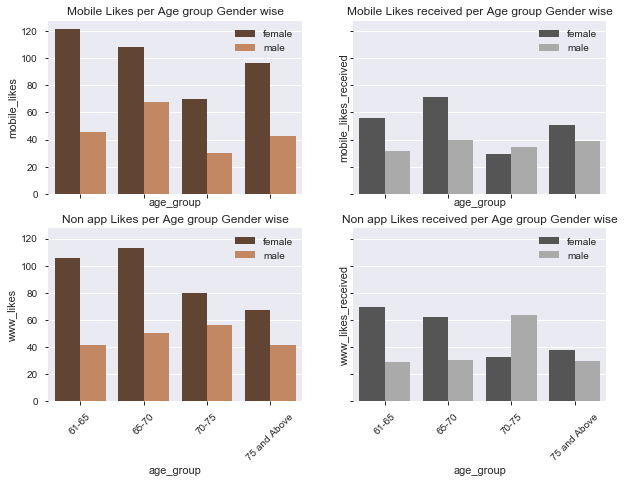

In [31]:
fig,ax=plt.subplots(2,2,sharey=True, sharex=True,figsize=(10,7))
sns.barplot(x='age_group', y='mobile_likes',
                hue="gender",
                data=c,ax=ax[0,0],palette="copper").set_title('Mobile Likes per Age group Gender wise');

sns.barplot(x='age_group', y='mobile_likes_received',
                hue="gender",
                data=c,ax=ax[0,1],palette="gray").set_title('Mobile Likes received per Age group Gender wise');

sns.barplot(x='age_group', y='www_likes',
                hue="gender",
                data=c,ax=ax[1,0],palette="copper").set_title('Non app Likes per Age group Gender wise');
sns.barplot(x='age_group', y='www_likes_received',
                hue="gender",
                data=c,ax=ax[1,1],palette="gray").set_title('Non app Likes received per Age group Gender wise')

for i in range(2):
    for j in range(2):
        ax[i][j].legend(loc='upper right', frameon=False)
        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(45)
        
plt.show()


###### Findings
- Likes are more in number than likes received for females whereas males has the likes and likes received in almost same in number
- mobile vs web- almost is same 
- male in the age group 70-75 shows that are using web mode for FB more than mobile mode

###### Observations and Insights (61-80)

- Distribution of age with tenure,gender and DOB Year

  - People with 61-70 age group are most in the sample. All of these people are mostly more than 5 years in FB. Both the genders are equally there on FB

- Correlation between number of friends vs likes

  - Number of friends is strongly correlated with friendship initiated, mobile likes received/mobile likes and web likes received/web likes are eqally correlated with the likes received/likes.
  - Likes received are positively correlated to number of friends but not very strongly. Likes received vs likes given are as well positively correlated but not very strongly.
  - Likes and age are in weak negative correlation
  
- likes and friend count based on age group

  - likes is more number in females with 61-70 age group and it decreases in age group 70 and Above
  - likes received is more in females with 61-70 age group than other age groups
  - friend_count is more for males with age group 75 and Above.
  
- likes in mode of FB usage: web vs mobile

  - Likes are more in number than likes received for females whereas males has the likes and likes received in almost same in number
  - mobile vs web: almost is same : male in the age group 70-75 shows that are using dektop mode for FB more than mobile mode

###### Actions/Insights:

- Females with 61-70 agegroup receives and gets more likes. These are the right crowd to target while promotions on FB. Males of 75-80 can be targetted as well since they have good number of friends count and word of mouth could be a good way for promotion in this group

## Final Insights
- The 25-40 agegroup and 41-60 is mostly present in Twitter and is also active mostly on Twitter than on Facebook.Conclusion below:
###### Any product targetted towards 25-60 age group should be targetted via twitter than on Facebook. 


- The age group 11-24 is mostly present on Facebook than on Twitter however when number of favourites/likes and connections/friends are checked, it concludes that this group is more active on Twitter and not on facebook.Hence, product campaign can happen in either of the platform for products targetted at 11-24 age group. Facebook since presence of this group is high and Twitter since they are very active on Twitter. Digging further its found as below:
###### Females with 17-20 agegroup and who uses mobile to access FB have more friends and also receives and gets more likes. These are the right crowd to target while promotions on FB


- 60-80 group is present on FB mostly and very few on Twitter. So, not a good idea to campaign in Twitter even if its activity is high.To campaign a product targetted at this group, it should be done on FB platform because of their presence on FB. Digging further its found as below:
######  Females with 61-70 agegroup receives and gets more likes. These are the right crowd to target while promotions on FB. Males of 75-80 can be targetted as well since they have good number of friends count and word of mouth could be a good way for promotion in this group



- Above 80 is high on activity in Twitter but their presence is much less in Twitter or Facebook.Conclusion as below:
###### Any product targetted to above 80 is not suggested to be campaigned on any of these platforms. 
